# Aquisição de Dados
O texto escolhido foi  discurso do Bolsonaro durante a conferencia da ONU em 2019-09-24 porque se trata do atual representante do nosso país em uma conferência de grande importância geopolítica.

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Projeto Mercado de Trabalho/Novo Documento de Texto (2).txt'
with open(file_path,'r') as f:
  text = f.read()
texto = text.split()


# Descarte de caracteres especiais

In [ ]:
for i,_ in enumerate(texto):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') 

In [ ]:
print(texto)

['analista', 'de', 'dados', 'jr', 'cnn', 'brasil', 'são', 'paulo', 'brazil', 'hybrid', '6', 'days', 'ago', 'over', '200', 'full-time', '·', 'associate', 'easy', 'apply', 'atividades:', 'coleta', 'de', 'dados:', 'automatização', 'e', 'integração', 'processo', 'de', 'extração', 'transformação', 'e', 'carregamento', 'dos', 'dados', 'etl', 'desenvolvimento', 'e', 'gestão', 'de', 'data', 'warehouse', 'suporte', 'nas', 'análises', 'e', 'criação', 'de', 'modelos', 'conhecimentos:', 'sql', 'phyton', 'bigquery', 'digital', 'analytics', 'integrações', 'com', 'apis', 'de', 'redes', 'sociais', 'e', 'google', 'analytics', 'analista', 'bi', 'júnior', 'somos', 'uma', 'das', 'mais', 'admiradas', 'incorporadoras', 'do', 'setor', 'imobiliário', 'brasileiro', 'e', 'buscamos', 'pessoas', 'que', 'assim', 'como', 'nós', 'são', 'apaixonadas', 'por', 'criar', 'soluções', 'inovadoras', 'e', 'proporcionar', 'experiências', 'únicas', 'aos', 'clientes', 'mais', 'do', 'que', 'empreendimentos', 'entregamos', 'sonho

# Construção do Dicionário

In [ ]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)    


{'analista': 19, 'de': 225, 'dados': 36, 'jr': 14, 'cnn': 1, 'brasil': 6, 'são': 16, 'paulo': 11, 'brazil': 9, 'hybrid': 2, '6': 1, 'days': 3, 'ago': 9, 'over': 6, '200': 5, 'full-time': 9, '·': 19, 'associate': 5, 'easy': 1, 'apply': 9, 'atividades:': 1, 'coleta': 1, 'dados:': 2, 'automatização': 1, 'e': 172, 'integração': 2, 'processo': 2, 'extração': 2, 'transformação': 6, 'carregamento': 1, 'dos': 26, 'etl': 2, 'desenvolvimento': 9, 'gestão': 2, 'data': 17, 'warehouse': 1, 'suporte': 3, 'nas': 6, 'análises': 4, 'criação': 4, 'modelos': 1, 'conhecimentos:': 1, 'sql': 9, 'phyton': 1, 'bigquery': 1, 'digital': 4, 'analytics': 14, 'integrações': 2, 'com': 49, 'apis': 1, 'redes': 1, 'sociais': 1, 'google': 3, 'bi': 22, 'júnior': 9, 'somos': 9, 'uma': 16, 'das': 15, 'mais': 21, 'admiradas': 2, 'incorporadoras': 1, 'do': 30, 'setor': 2, 'imobiliário': 2, 'brasileiro': 1, 'buscamos': 9, 'pessoas': 11, 'que': 50, 'assim': 2, 'como': 11, 'nós': 8, 'apaixonadas': 2, 'por': 8, 'criar': 3, 'sol

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

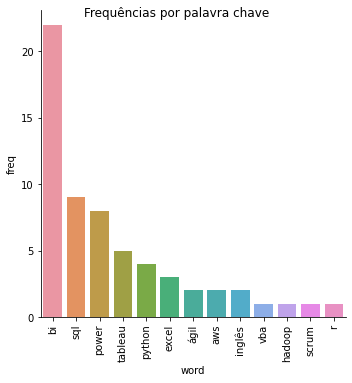

In [ ]:
from operator import is_not
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

list_word = []
list_freq = []

for key, values in mydict.items():                    #converter o dict em data frame, precisamos fazer duas lists, cada uma atrelada a uma key (column name)
  list_word.append(key)                               #armazenar todas as palavras em uma lista
  list_freq.append(values)                            #armazenar todas as frequencias em uma lista

df_dict = {'word' :  list_word, 'freq' : list_freq}   #criar um dict com as keys sendo o nome das colunas do meu df

df = pd.DataFrame(df_dict)                            #coonverter a lista em df

df = df.sort_values('freq', ascending = False)        #ordenar para ver quais sao as palavras mais recorrentes.

df['word'] = df['word'].str.lower()                   # todos em lower case para evitar problemas (case sensitivy )
palavras_chave = ['python', 
                  'r',
                  'excel',
                  'tableau', 
                  'powerbi',
                  'sql', 
                  'agile',
                  'scala',
                  'pytorch',                           #palavras que julgo interassente saber as frequencias
                  'scrum',
                  'bi',
                  'aws', 
                  'hadoop',
                  'spark', 
                  'vba', 
                  'inglês',
                  'power', 
                  'ágil']                            
df_filtrado = df[df['word'].isin(palavras_chave)]     # data frame apenas com as palavras interessantes.

df_filtrado
g = sns.catplot(data = df_filtrado, x = 'word', y = 'freq', kind = 'bar')
g.fig.suptitle("Frequências por palavra chave")
plt.xticks(rotation = 90)